In [1]:
!pip install catboost
!pip install shap
from catboost import Pool, CatBoostRegressor, cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 71 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.6 MB/s 


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

In [ ]:
!gdown 1WwyO371fkmnxtdJITPQqrOirkdUnfR7L

Downloading...
From: https://drive.google.com/uc?id=1WwyO371fkmnxtdJITPQqrOirkdUnfR7L
To: /content/Matrix_complexity.csv
100% 1.39M/1.39M [00:00<00:00, 115MB/s]


In [ ]:
data_all = pd.read_csv('/content/Matrix_complexity.csv')
data_all

,film,Subj,Alpha_Fz,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_Pz,Alpha_P3,Alpha_P7,...,SpEn_O1,SpEn_Oz,SpEn_O2,SpEn_P4,SpEn_P8,SpEn_Cz,SpEn_C4,SpEn_T8,SpEn_F4,SpEn_F8
0,1,1,2.526810,1.913928,4.005514,2.027418,4.022892,1.949431,1.321008,1.879488,...,0.756752,0.731636,0.770763,0.511796,0.747356,0.734549,0.573571,0.666546,0.701854,0.541023
1,1,2,6.010149,3.606064,NaN,4.523674,4.651910,2.815613,3.860679,5.419934,...,0.588688,0.690308,0.753110,0.658623,0.622934,0.705115,0.694461,0.596211,0.661915,0.626924
2,1,3,2.376723,2.213678,2.865767,3.072331,3.532807,1.990123,2.241788,2.574973,...,0.743003,0.701456,0.737281,0.687757,0.755020,0.690869,0.664579,0.732706,0.671702,0.712289
3,1,4,2.649139,2.270000,3.387474,2.363346,3.756334,2.173137,1.869292,2.943064,...,0.723969,0.708789,0.720716,0.638770,0.747617,0.701575,0.635875,0.704821,0.676821,0.660730
4,1,6,5.108710,NaN,NaN,10.953561,NaN,6.452085,9.667544,10.095658,...,0.678508,0.724328,0.782440,0.802430,0.697681,0.749899,0.768600,0.697917,0.762089,0.740299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,3,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,7,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,6,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = data_all.columns

In [ ]:
cols = cols.drop(['film', 'Subj'])

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def NestedCrossVal(X, y, model, params):
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

  search = GridSearchCV(model, params, cv=cv_inner, refit=True, verbose=10)
  cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
  scores = cross_val_score(search, X, y, cv=cv_outer, verbose=10, n_jobs=-1)

  return search, scores

In [ ]:
X = data_all.reset_index(drop=True)

y = np.array(X['Labels'])

X = X[cols]

X = X.drop('Labels',axis=1)


In [ ]:
X_test = data_all.loc[(data_all['film']  == 2)].reset_index(drop=True)
X_train = data_all.loc[(data_all['film'] != 2)].reset_index(drop=True)

y_train = np.array(X_train['Labels'])
y_test = np.array(X_test['Labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
test_film = X_test['film']
test_subj = X_test['Subj']

X_train = X_train[cols]
X_test = X_test[cols]

print(y_test)
print(y_train)

X_train = X_train.drop('Labels',axis=1)
X_test = X_test.drop('Labels',axis=1)

[10  8  3  6  7  4  7  8  8  5 10  7  7  6  7  7  6  4  2  8]
[10 10  6  8  7  9  5  8  3  8 10  8 10  9  6  9 10  5  5  2  7  5  5  2
  4  5  2  7  3  6  5  5  4  8  5  8  6  3  5  9  6  9  8  3  9  3  3  5
  9  7  8 10  4  7  8 10  9  9  7  5  5  5  9  3  7  1  8 10  3  1  7  6
 10 10  7  8  9  6  5  7  3  8  2  5  3  7  8  8  7  9  7  8  5  6  5  6
  5  4  2  8  8  5  6  6  8  3  9  5  9  9  7 10  8  9  9  2  6  5  5  7
  9  2  4  2  6  4  9  5  9  5  5  6  7  1  2  3  7  4  3  9  6  1  9  6
  7  6]


Learning rate set to 0.03021
0:	learn: 2.4345690	total: 103ms	remaining: 1m 42s
1:	learn: 2.4205394	total: 173ms	remaining: 1m 26s
2:	learn: 2.4033452	total: 246ms	remaining: 1m 21s
3:	learn: 2.3929707	total: 319ms	remaining: 1m 19s
4:	learn: 2.3799706	total: 392ms	remaining: 1m 17s
5:	learn: 2.3653076	total: 463ms	remaining: 1m 16s
6:	learn: 2.3511482	total: 541ms	remaining: 1m 16s
7:	learn: 2.3395812	total: 614ms	remaining: 1m 16s
8:	learn: 2.3268812	total: 687ms	remaining: 1m 15s
9:	learn: 2.3163493	total: 759ms	remaining: 1m 15s
10:	learn: 2.3017510	total: 833ms	remaining: 1m 14s
11:	learn: 2.2883297	total: 907ms	remaining: 1m 14s
12:	learn: 2.2742453	total: 1s	remaining: 1m 16s
13:	learn: 2.2601361	total: 1.07s	remaining: 1m 15s
14:	learn: 2.2498607	total: 1.15s	remaining: 1m 15s
15:	learn: 2.2383914	total: 1.22s	remaining: 1m 15s
16:	learn: 2.2282522	total: 1.29s	remaining: 1m 14s
17:	learn: 2.2164554	total: 1.37s	remaining: 1m 14s
18:	learn: 2.2050362	total: 1.45s	remaining: 1m 

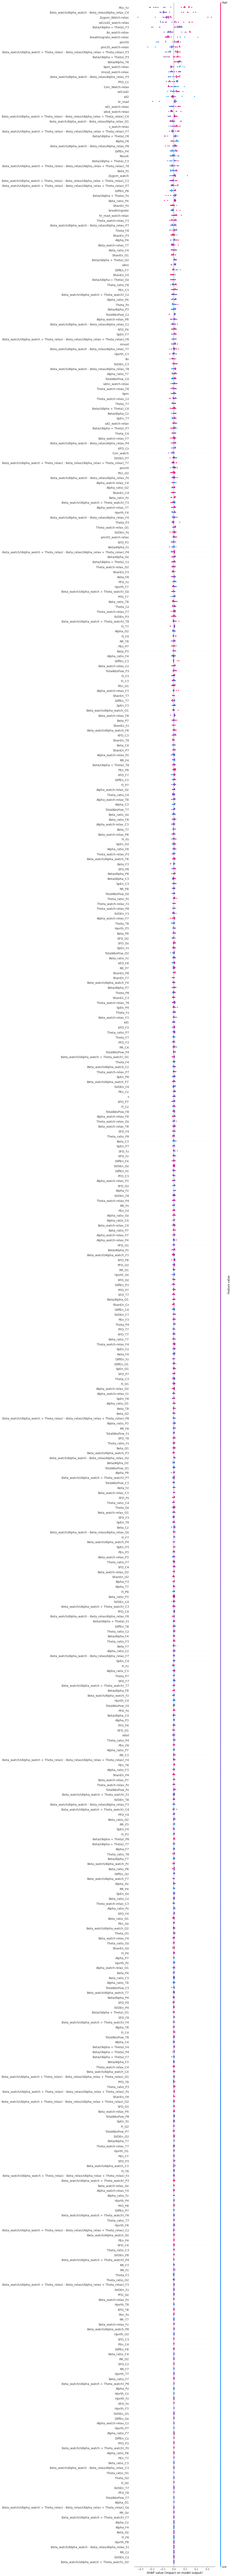

In [ ]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=len(X_train.columns), show=False)

In [ ]:
metrics = [
  "neg_mean_absolute_error",
  "neg_root_mean_squared_error",
  "neg_mean_absolute_percentage_error"
  ]

In [ ]:
from sklearn.model_selection import cross_validate
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_validate(model, X, y, cv=cv, scoring=metrics, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.3min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.4min finished


In [ ]:
def print_metrics(metrics, scores):
  for metric in metrics:
    print(metric+ ":\n",
          "mean:", - pd.DataFrame(scores['test_'+metric]).mean()[0], '\n',
          "std:", pd.DataFrame(scores['test_'+metric]).std()[0], '\n',
          "min:", - pd.DataFrame(scores['test_'+metric]).quantile(0)[0], '\n',
          "25%:", - pd.DataFrame(scores['test_'+metric]).quantile(0.25)[0], '\n',
          "50%:", - pd.DataFrame(scores['test_'+metric]).median()[0], '\n',
          "75%:", - pd.DataFrame(scores['test_'+metric]).quantile(0.75)[0], '\n',
          "max:", - pd.DataFrame(scores['test_'+metric]).quantile(1)[0], '\n')

In [ ]:
print_metrics(metrics, scores)
        

neg_mean_absolute_error:
 mean: 2.003082348305685 
 std: 0.18423384604278353 
 min: 2.2029221817246385 
 25%: 2.111679568842711 
 50%: 2.085040454171707 
 75%: 1.8315258688154938 
 max: 1.784243667973877 

neg_root_mean_squared_error:
 mean: 2.401395222216708 
 std: 0.17415848167219172 
 min: 2.589704736190836 
 25%: 2.531365159227859 
 50%: 2.4358910919946726 
 75%: 2.2777184282292913 
 max: 2.172296695440883 

neg_mean_absolute_percentage_error:
 mean: 0.5100938597888748 
 std: 0.08333445052499712 
 min: 0.5991508629647767 
 25%: 0.5696084703061587 
 50%: 0.5206008583461188 
 75%: 0.47263771205910915 
 max: 0.3884713952682106 



In [ ]:
from sklearn.feature_selection import SelectFromModel

class CustomFeatureSelection(SelectFromModel):
    def transform(self, X):
        important_features_indices = list(self.get_support(indices=True))

        _X = X.iloc[:, important_features_indices].copy()
        return _X

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('selector', CustomFeatureSelection(CatBoostRegressor(verbose=False), max_features=15)),
    ('est', CatBoostRegressor(verbose=False,iterations=1500, depth=4))])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('selector',
                 CustomFeatureSelection(estimator=<catboost.core.CatBoostRegressor object at 0x7f659ca180d0>,
                                        max_features=15)),
                ('est',
                 <catboost.core.CatBoostRegressor object at 0x7f659ca18ad0>)])

In [ ]:
best_features = pipeline[:-1].get_feature_names_out()
X_train_new = X_train[best_features]
X_test_new = X_test[best_features]

In [ ]:
X = X[best_features]

In [ ]:
params = {
  'l2_leaf_reg': [0, 0.33, 0.66, 1],
  'depth': [6, 8, 10]
}
model, score = NestedCrossVal(X, y, model, params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 17.6min remaining: 11.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 21.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 21.6min finished


In [ ]:
model.fit(X_train_new, y_train)

In [ ]:
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X_test_new)
shap.summary_plot(shap_values, X_test_new, max_display=len(X_train_new.columns), show=False)

In [ ]:
y_pred = model.predict(X_test_new)

In [ ]:
pool = Pool(X_test_new, y_test)

In [ ]:
pd.DataFrame(y_pred).hist()

In [ ]:
pd.DataFrame(y_test).hist()

In [ ]:
from sklearn.model_selection import cross_validate
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_validate(model.best_estimator_, X, y, cv=cv, scoring=metrics, verbose=10, n_jobs=-1)

In [ ]:
print_metrics(metrics, scores)
        